# Customer Support Model on X: Interference
copyright 2023, Denis Rothman

**Customizing a Pretrained a Generative AI model**

**Model:**  RobertaForCausalLM

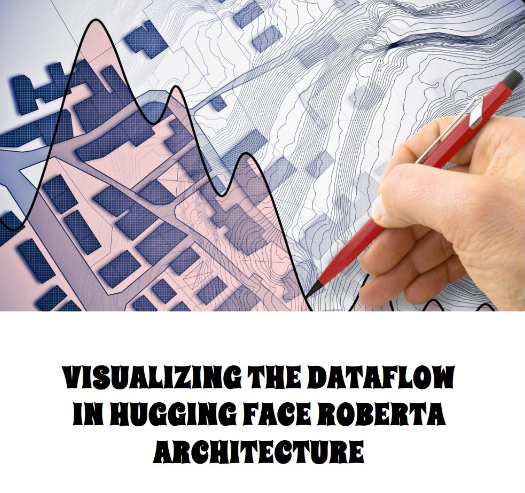

In [ ]:
!pip install Transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 42.5 MB/s eta 0:00:00


# 1.Load the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "drive/MyDrive/files/model_BERT/"

config.json  generation_config.json  model.safetensors	training_args.bin


In [ ]:
#1.A.for standalone run : mount Google Drive and path to pretrained model
model_path="drive/MyDrive/files/model_BERT/"

In [ ]:
# 1.B Load the trained model and tokenizer : model and tokenizer
from transformers import RobertaConfig, RobertaForCausalLM
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForCausalLM.from_pretrained(model_path)

# 2.Inference with the Generative AI Agent

## Input

In [ ]:
prompt = "I would like to assist you and I will tell you why your iphone doesn't work because "
# Augment the input of modidify it: Add your filters, moderation detectors, input modification, cultural control here
inputs = tokenizer(prompt, return_tensors="pt", max_length=50, truncation=True)

## Model Controller Mechanism

In [ ]:
import torch
from torch.nn.functional import softmax

def top_k_top_p_filtering(logits, top_k=0, top_p=0.0, filter_value=-float('Inf')):
    """ Filter a distribution of logits using top-k and/or nucleus (top-p) filtering """
    top_k = min(top_k, logits.size(-1))  # Safety check
    if top_k > 0:
        indices_to_remove = logits < torch.topk(logits, top_k)[0][..., -1, None]
        logits[indices_to_remove] = filter_value

    if top_p > 0.0:
        sorted_logits, sorted_indices = torch.sort(logits, descending=True)
        cumulative_probs = torch.cumsum(softmax(sorted_logits, dim=-1), dim=-1)

        sorted_indices_to_remove = cumulative_probs > top_p
        sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
        sorted_indices_to_remove[..., 0] = 0

        indices_to_remove = sorted_indices[sorted_indices_to_remove]
        # We make sure the indices are in the second dimension
        logits.index_fill_(1, indices_to_remove, filter_value)

    return logits

# Define temperature, top_k, and top_p values
temperature = 0.9
top_k = 50
top_p = 0.95

# Initialize input_ids variable
input_ids = inputs["input_ids"]
model.eval()  # Make sure the model is in evaluation mode

# Generation loop : CONTROLLING THE INPUT/OUTPUT Token by token
# Each loop generates a token that you can control, modifify and augment
max_length=100
with torch.no_grad():
    for _ in range(max_length):  # Adjust the range for desired output length
        outputs = model(input_ids)
        logits = outputs.logits

        # Get the logits of the last predicted token
        next_token_logits = logits[:, -1, :]

        # ADD YOUR CONTROLE FUNCTIONS HERE:
        # modifiy the probabilities of the logits with rule-bases, filters
        # modify the order of the temperature, top-k, top-p and/or add other
        # modify the functions in this code including the way softmax is applied
        # add your own functions to this code
        # you can control the output : filter, modify, augment, add rules, add cultural or knowledge base rules

        # Apply temperature
        next_token_logits = next_token_logits / temperature

        # Filter
        filtered_logits = top_k_top_p_filtering(next_token_logits, top_k=top_k, top_p=top_p)

        # Sample the next token
        next_token = torch.multinomial(softmax(filtered_logits, dim=-1), num_samples=1)

        # Append to the input_ids and continue
        input_ids = torch.cat([input_ids, next_token], dim=-1)

        if next_token.item() == tokenizer.eos_token_id:
            break

def print_in_paragraph(text, words_per_line):
    words = text.split()
    for i in range(0, len(words), words_per_line):
        print(' '.join(words[i:i+words_per_line]))

# Decode the generated output
generated_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
n = 10  # number of words per line
print_in_paragraph(generated_text, n)

I would like to assist you and I will tell
you why your iphone doesn't work because so that you've
received an iphone x we've shared your device with all
of them ios software update if you've been using any
other apps
